# Pandorable pandas

pandas is ...

In this tutorial, we'll emphasize writing code that is clean and efficient.

### Preview

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
flights = pd.read_parquet("data/nyc-flights.parquet.gz")
flights

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


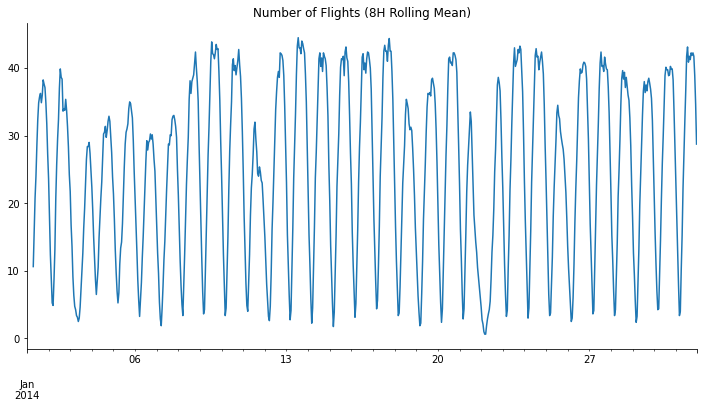

In [3]:
(flights['dep']
    .value_counts()
    .resample('H')
    .sum()
    .rolling(8).mean()
    .plot(figsize=(12, 6),
          title="Number of Flights (8H Rolling Mean)"))
sns.despine()

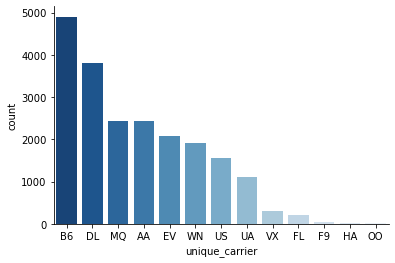

In [8]:
sns.countplot(
    x='unique_carrier',
    data=flights,
    order=flights['unique_carrier'].value_counts().index,
    palette='Blues_r'
)
sns.despine()


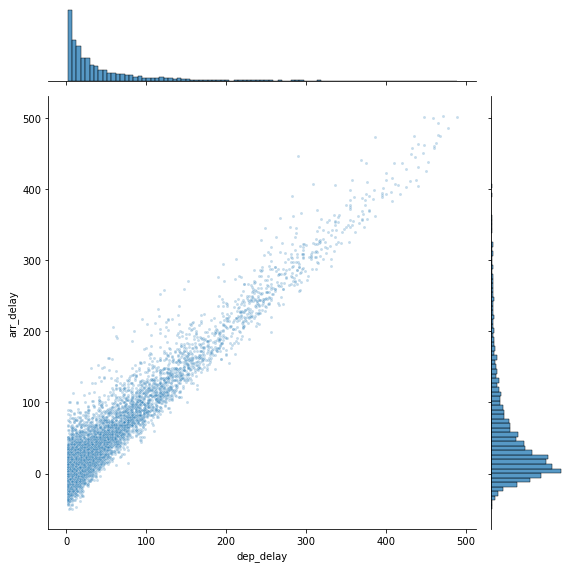

In [12]:
mask = (flights["dep_delay"] > 1) & (flights["dep_delay"] < 500)

sns.jointplot(x='dep_delay',
              y='arr_delay',
              data=flights[mask],
              alpha=.25, marker='.', height=8);

## A familiar story.

From [Jeff Allen's](http://trestletech.com/wp-content/uploads/2015/07/dplyr.pdf) presentation on dplyr:

```python
tumble_after(
    broke(
        fell_down(
            fetch(
                went_up(jack_jill, "hill"),
                "water"),
            jack),
        "crown"),
    "jill"
)
```

Typically, functions / methods are *verbs* while arguments are *nouns*. You *do something* (apply a function) *to something* (the argument).

And in English, we read left-to-right, top-to-bottom. Not inside out. Let's rewrite the story.

```python
story = (
    jack_jill
        .went_up("hill")
        .fetch("water")
        .fell_down("jack")
        .broke("crown")
        .tumble_after("jill")
)
```